In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


# Telco Customer Churn

# What Is Customer Churn?

Customer churn is one of the most important metrics for a growing business to evaluate. While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention

It's hard to measure success if you don't measure the inevitable failures, too. While you strive for 100% of customers to stick with your company, that's simply unrealistic. That's where customer churn comes in.

# How to Reduce Customer Churn
1. Focus your attention on your best customers.
Rather than simply focusing on offering incentives to customers who are considering churning, it could be even more beneficial to pool your resources into your loyal, profitable customers.

2. Analyze churn as it occurs.
Use your churned customers as a means of understanding why customers are leaving. Analyze how and when churn occurs in a customer's lifetime with your company, and use that data to put into place preemptive measures.

3. Show your customers that you care.
Instead of waiting to connect with your customers until they reach out to you, try a more proactive approach. Communicate with them all the perks you offer and show them you care about their experience, and they'll be sure to stick around.

In [3]:
# import Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import plotly.express as px

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from category_encoders import OneHotEncoder
from sklearn.preprocessing import  LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.linear_model import LogisticRegression
 
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split,RepeatedStratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


# About Data

In [4]:
df=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


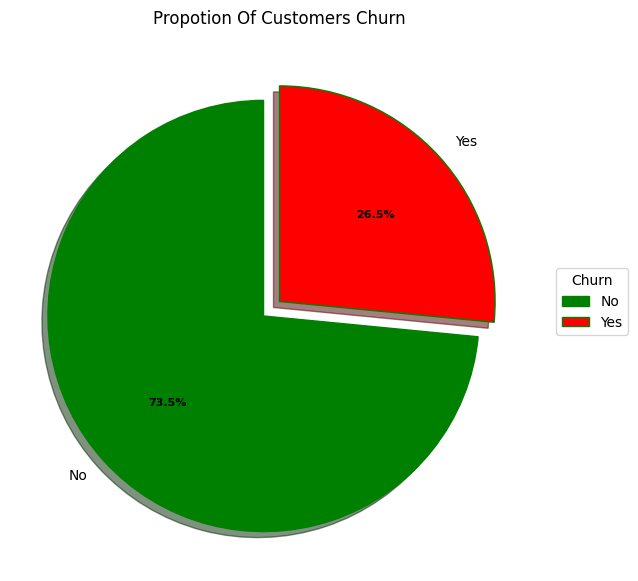

In [47]:
# Creating plot
att=df['Churn'].value_counts(normalize=True)
explode = (0.1, 0.0, )
 
# Creating color parameters
colors = ( "green", "red")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
 
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(att,
                                  autopct = lambda pct: func(pct, att),
                                  explode = explode,
                                  labels = att.index,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, att.index,
          title ="Churn",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Propotion Of Customers Churn")
 
# show plot
plt.show()

# Exploratory Data Analysis

# Demographic info about customers

## 1- Gender

In [7]:
gndr_crn=df.groupby(['gender','Churn']).apply(lambda x:x['Churn'].count()).reset_index(name='Counts')

In [8]:
gndr_crn

,gender,Churn,Counts
0,Female,No,2549
1,Female,Yes,939
2,Male,No,2625
3,Male,Yes,930


In [9]:
fig=px.bar(gndr_crn,x='gender',y='Counts',color='Churn', text_auto=True,title='Gender counts of Customers in an Organization')
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.show()

- looks like gener have no affect on churn 

## 2- age

In [10]:
snrctzn_crn=df.groupby(['SeniorCitizen','Churn']).apply(lambda x:x['Churn'].count()).reset_index(name='Counts')
fig=px.bar(snrctzn_crn,x='SeniorCitizen',y='Counts',color='Churn', text_auto=True,title='Gender counts of Customers in an Organization')
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.show()

In [11]:
per=np.array([(4508/(4508+1393)),(1393/(4508+1393)),(666/(666+476)),(476/(666+476))]).round(2)
snrctzn_crn['Percent']=per
fig=px.bar(snrctzn_crn,x='SeniorCitizen',y='Percent',color='Churn', text_auto=True)
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.show()

Although the percentage of elderly people is small compared to the number of customers, the percentage of elderly people who have dispensed with the service is very large, reaching 42%.

<Axes: title={'center': 'MonthlyCharges'}, xlabel='SeniorCitizen'>

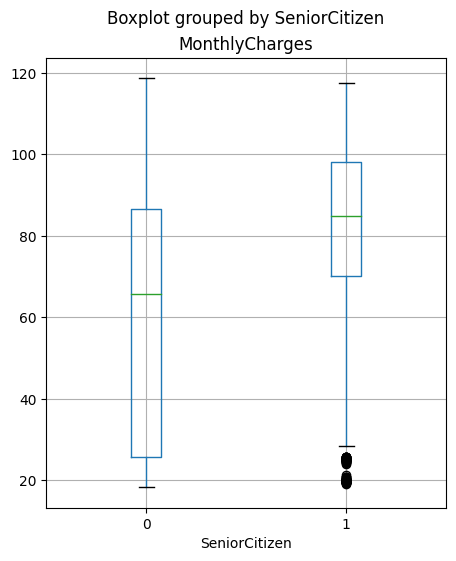

In [12]:
df.boxplot(column='MonthlyCharges', by='SeniorCitizen', figsize=(5,6))


They have higher monthly charges than non senior citizens do.

## 3- partner 

In [13]:
prtnr_crn=df.groupby(['Partner','Churn']).apply(lambda x:x['Churn'].count()).reset_index(name='Counts')
fig=px.bar(prtnr_crn,x='Partner',y='Counts',color='Churn', text_auto=True,title='prtnr_crn counts of Customers in an Organization')
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.show()

In [14]:
per=np.array([(2441/(2441+1200)),(1200/(2441+1200)),(2733/(669+2733)),(669/(669+2733))]).round(2)
prtnr_crn['Percent']=per
fig=px.bar(prtnr_crn,x='Partner',y='Percent',color='Churn', text_auto=True)
fig.update_layout(barmode='group', xaxis_tickangle=0)
fig.show()

Customers who leave the service and have no partners have higher churn rate than who leave the service and have partners 

# Services that each customer has signed up for
- phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

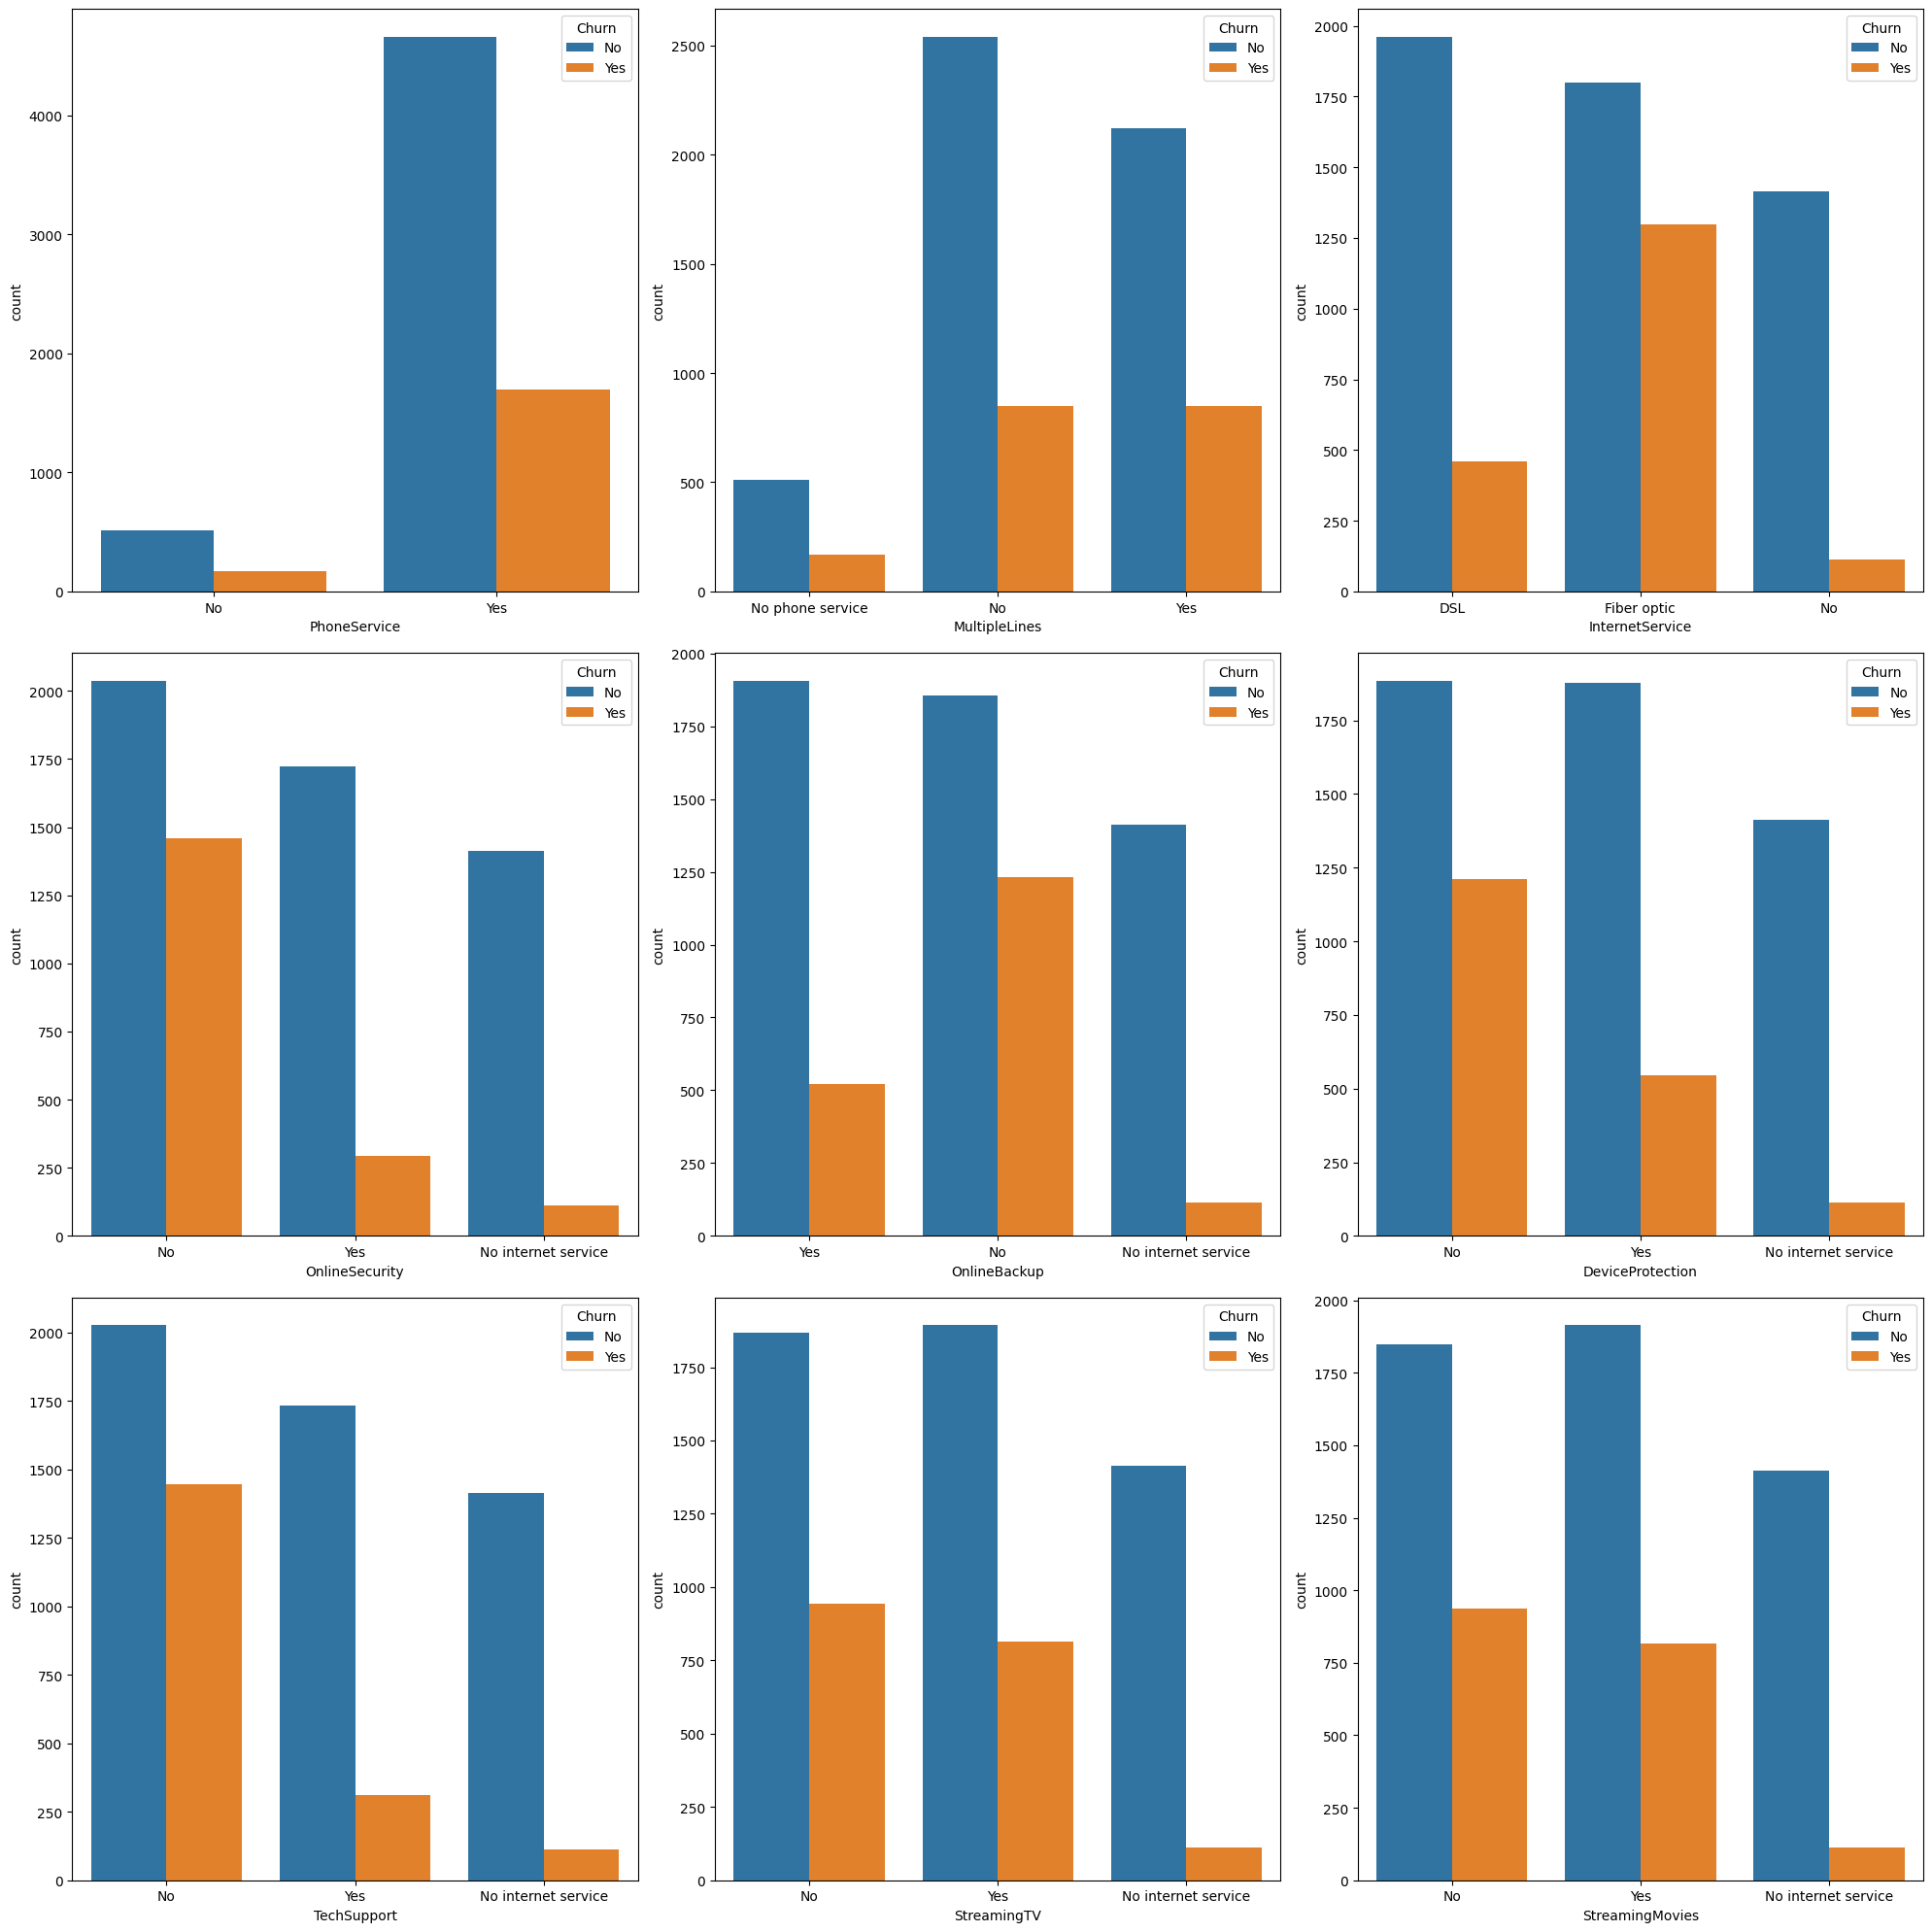

In [15]:
col=['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig,axs=plt.subplots(3,3,figsize=(20,20))
axs=axs.flatten()
for i,var in enumerate(col):
    sns.countplot(data=df,x=var,hue='Churn',ax=axs[i])
plt.tight_layout()
plt.show()

- For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
- In case of MultipleLines, churn rate in when the Multiplelines are present or not is the same.
- A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!
- StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned. Looks like the streaming content was not entirely at fault!

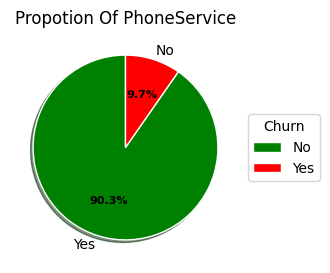

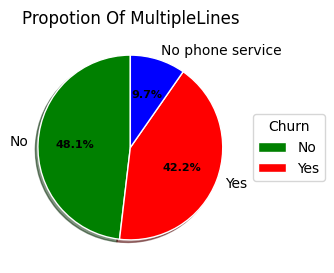

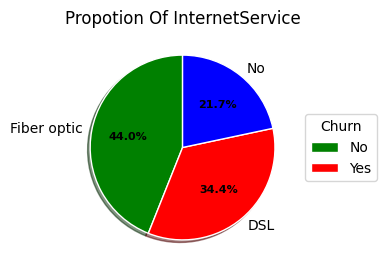

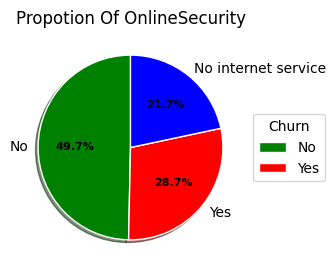

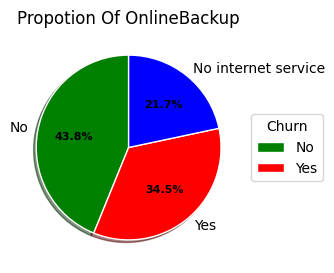

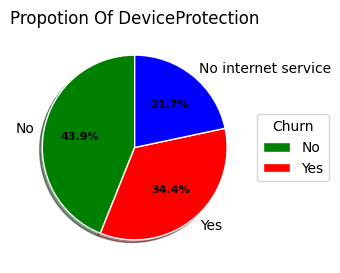

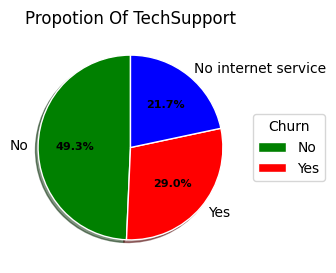

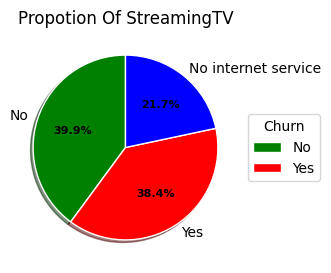

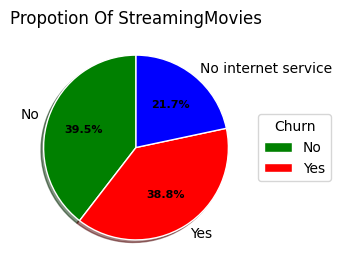

In [16]:
cols=col=['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for name in cols:
    n=df[name].nunique()
    col=df[name].value_counts(normalize=True)
    
    # Creating plot
    explode = (0.0,)*n

    # Creating color parameters
    colors = ( "green", "red","blue",'orange')

    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "white" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(7, 3))
    wedges, texts, autotexts = ax.pie(col,
                                      autopct = lambda pct: func(pct, col),
                                      explode = explode,
                                      labels = col.index,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="black"))

    # Adding legend
    ax.legend(wedges, att.index,
              title ="Churn",
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(f"Propotion Of {name}")

    # show plot
    plt.show()



# Services Subscribed by the Customer :

PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

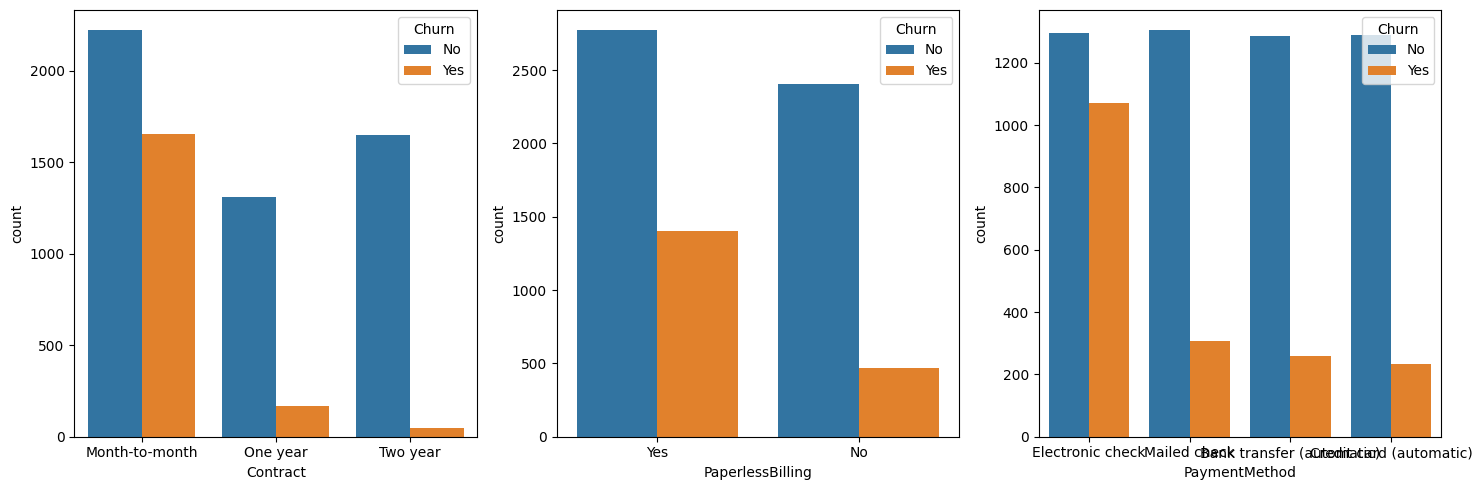

In [17]:
col=['Contract','PaperlessBilling','PaymentMethod'] 
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs=axs.flatten()
for i,var in enumerate(col):
    sns.countplot(data=df,x=var,hue='Churn',ax=axs[i])
plt.tight_layout()
plt.show()

- When it comes down to catering the customers, services w.r.t OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport are crucial from the above visualizations!
- A high number of customers have switched their service provider when it comes down poor services with the above mentioned features.

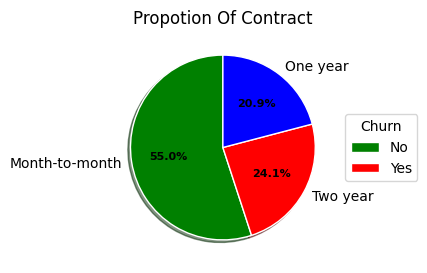

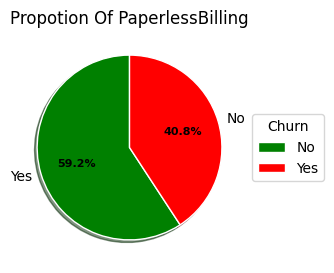

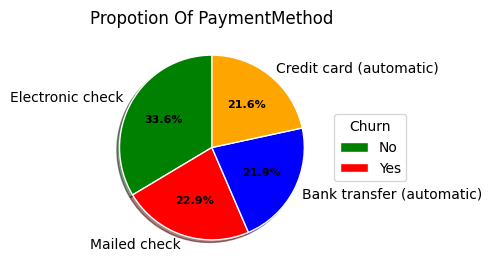

In [18]:
cols=['Contract','PaperlessBilling','PaymentMethod']
for name in cols:
    n=df[name].nunique()
    col=df[name].value_counts(normalize=True)
    
    # Creating plot
    explode = (0.0,)*n

    # Creating color parameters
    colors = ( "green", "red","blue",'orange')

    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "white" }

    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%".format(pct, absolute)

    # Creating plot
    fig, ax = plt.subplots(figsize =(7, 3))
    wedges, texts, autotexts = ax.pie(col,
                                      autopct = lambda pct: func(pct, col),
                                      explode = explode,
                                      labels = col.index,
                                      shadow = True,
                                      colors = colors,
                                      startangle = 90,
                                      wedgeprops = wp,
                                      textprops = dict(color ="black"))

    # Adding legend
    ax.legend(wedges, att.index,
              title ="Churn",
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))

    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(f"Propotion Of {name}")

    # show plot
    plt.show()



# Build Model 

## Split

In [19]:
target = "Churn"
X = df.drop(columns=[target,'customerID'])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (7043, 19)
y shape: (7043,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5634, 19)
y_train shape: (5634,)
X_test shape: (1409, 19)
y_test shape: (1409,)


## 1- RandomForestClassifier

In [39]:
# Fit on `X_train`, `y_train`
Dec_model = make_pipeline(OneHotEncoder(use_cat_names=True),StandardScaler(),
                          RandomForestClassifier(criterion='gini', 
    
    max_depth=50, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, 
    max_features=None, 
    random_state=None, 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None, 
    ccp_alpha=0.0,))
Dec_model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'Partner', 'Dependents',
                                     'PhoneService', 'MultipleLines',
                                     'InternetService', 'OnlineSecurity',
                                     'OnlineBackup', 'DeviceProtection',
                                     'TechSupport', 'StreamingTV',
                                     'StreamingMovies', 'Contract',
                                     'PaperlessBilling', 'PaymentMethod',
                                     'TotalCharges'],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=50, max_features=None))])

In [40]:
acc_train = Dec_model.score(X_train,y_train)
acc_test = Dec_model.score(X_test,y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9977
Test Accuracy: 0.8027


In [41]:
# Print classification report
print(classification_report(y_test,Dec_model.predict(X_test)))

              precision    recall  f1-score   support

          No       0.83      0.92      0.87      1036
         Yes       0.68      0.49      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

